In [1]:
import pickle
import numpy as np

filename = '/home/jovyan/share/Training/training_variables.p' # name of the pickle file that contains the training variables

with open(filename, 'rb') as file_:
    x_train, y_train, x_test, y_test = pickle.load(file_)

In [2]:
import keras
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import regularizers
from keras import backend as K
from keras import optimizers
import time
import os 

from history_tools import LossHistory, plot_history
import numpy as np

Using TensorFlow backend.


Modelo sin ningun tipo de regularización ni optimización

Model compiled
Training model...
Train on 286799 samples, validate on 31867 samples
Epoch 1/20
 - 12s - loss: 0.6616 - acc: 0.5992 - val_loss: 0.6141 - val_acc: 0.6639
Epoch 2/20
 - 10s - loss: 0.5637 - acc: 0.7167 - val_loss: 0.5391 - val_acc: 0.7336
Epoch 3/20
 - 8s - loss: 0.5127 - acc: 0.7499 - val_loss: 0.5006 - val_acc: 0.7580
Epoch 4/20
 - 8s - loss: 0.4837 - acc: 0.7679 - val_loss: 0.5028 - val_acc: 0.7598
Epoch 5/20
 - 10s - loss: 0.4638 - acc: 0.7812 - val_loss: 0.4579 - val_acc: 0.7896
Epoch 6/20
 - 9s - loss: 0.4488 - acc: 0.7910 - val_loss: 0.4439 - val_acc: 0.7988
Epoch 7/20
 - 9s - loss: 0.4385 - acc: 0.7971 - val_loss: 0.4382 - val_acc: 0.8021
Epoch 8/20
 - 9s - loss: 0.4318 - acc: 0.8017 - val_loss: 0.4383 - val_acc: 0.7997
Epoch 9/20
 - 9s - loss: 0.4274 - acc: 0.8042 - val_loss: 0.4372 - val_acc: 0.8029
Epoch 10/20
 - 8s - loss: 0.4219 - acc: 0.8078 - val_loss: 0.4254 - val_acc: 0.8094
Epoch 11/20
 - 8s - loss: 0.4193 - acc: 0.8085 - val_loss: 0.4688 - val_acc: 0.785

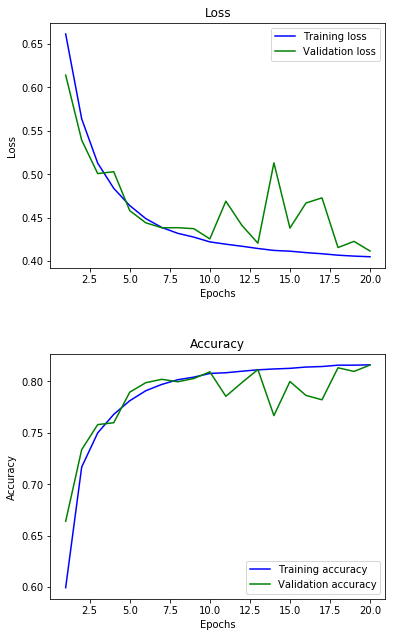

In [3]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=30))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(), metrics=['accuracy'])
print('Model compiled')



print('Training model...')

history = LossHistory()

n_epochs = 20 # Number of epochs definition
n_batch = 512 # Batch size definition



start_time = time.time()


model.fit(x_train, y_train, epochs=n_epochs,
          callbacks=[history],
         # validation_data=(x_test, y_test),
          validation_split=0.10,
          batch_size=n_batch,
          verbose=2,
          shuffle= True)

print("Training duration : {0}".format(time.time() - start_time) + " secs")



# Create a dir for the history output if it is not created yet:
if not os.path.exists('History/'): os.makedirs('History/')

# Plot accuracy and loss:
plot_history(history, Num_classes = 2, n_batch = n_batch, n_epochs = n_epochs)

Con RMS optimizer

Model compiled
Training model...
Train on 286799 samples, validate on 31867 samples
Epoch 1/20
 - 10s - loss: 0.4924 - acc: 0.7625 - val_loss: 0.4382 - val_acc: 0.8002
Epoch 2/20
 - 10s - loss: 0.4206 - acc: 0.8064 - val_loss: 0.4182 - val_acc: 0.8098
Epoch 3/20
 - 9s - loss: 0.4086 - acc: 0.8125 - val_loss: 0.4336 - val_acc: 0.7982
Epoch 4/20
 - 9s - loss: 0.4030 - acc: 0.8150 - val_loss: 0.4098 - val_acc: 0.8154
Epoch 5/20
 - 9s - loss: 0.3997 - acc: 0.8169 - val_loss: 0.4079 - val_acc: 0.8170
Epoch 6/20
 - 12s - loss: 0.3971 - acc: 0.8185 - val_loss: 0.4098 - val_acc: 0.8137
Epoch 7/20
 - 11s - loss: 0.3952 - acc: 0.8199 - val_loss: 0.4005 - val_acc: 0.8190
Epoch 8/20
 - 9s - loss: 0.3937 - acc: 0.8206 - val_loss: 0.4077 - val_acc: 0.8152
Epoch 9/20
 - 9s - loss: 0.3924 - acc: 0.8210 - val_loss: 0.3967 - val_acc: 0.8199
Epoch 10/20
 - 9s - loss: 0.3912 - acc: 0.8213 - val_loss: 0.3988 - val_acc: 0.8203
Epoch 11/20
 - 9s - loss: 0.3902 - acc: 0.8219 - val_loss: 0.3986 - val_acc: 0.82

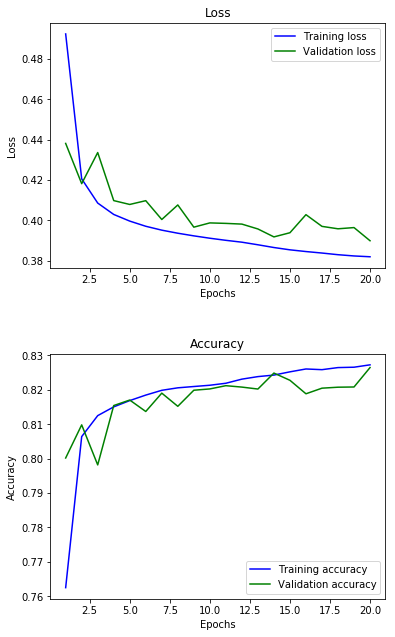

In [4]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=30))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])
print('Model compiled')



print('Training model...')

history = LossHistory()

n_epochs = 20 #number of epochs definition
n_batch =512 #batch size definition



start_time = time.time()


model.fit(x_train, y_train, epochs=n_epochs,
          callbacks=[history],
         # validation_data=(x_test, y_test),
          validation_split=0.10,
          batch_size=n_batch,
          verbose=2,
          shuffle= True)

print("Training duration : {0}".format(time.time() - start_time) + " secs")



# Create a dir for the history output if it is not created yet:
if not os.path.exists('History/'): os.makedirs('History/')

# Plot accuracy and loss:
plot_history(history, Num_classes = 2, n_batch = n_batch, n_epochs = n_epochs)

Modelo con optimización Adam

Model compiled
Training model...
Train on 286799 samples, validate on 31867 samples
Epoch 1/20
 - 16s - loss: 0.4982 - acc: 0.7504 - val_loss: 0.4260 - val_acc: 0.8067
Epoch 2/20
 - 11s - loss: 0.4117 - acc: 0.8123 - val_loss: 0.4160 - val_acc: 0.8112
Epoch 3/20
 - 11s - loss: 0.4017 - acc: 0.8170 - val_loss: 0.4036 - val_acc: 0.8194
Epoch 4/20
 - 12s - loss: 0.3970 - acc: 0.8201 - val_loss: 0.3993 - val_acc: 0.8219
Epoch 5/20
 - 13s - loss: 0.3932 - acc: 0.8218 - val_loss: 0.3967 - val_acc: 0.8232
Epoch 6/20
 - 10s - loss: 0.3905 - acc: 0.8226 - val_loss: 0.3962 - val_acc: 0.8224
Epoch 7/20
 - 11s - loss: 0.3888 - acc: 0.8235 - val_loss: 0.3932 - val_acc: 0.8248
Epoch 8/20
 - 11s - loss: 0.3876 - acc: 0.8241 - val_loss: 0.3940 - val_acc: 0.8247
Epoch 9/20
 - 13s - loss: 0.3864 - acc: 0.8244 - val_loss: 0.3922 - val_acc: 0.8239
Epoch 10/20
 - 15s - loss: 0.3852 - acc: 0.8250 - val_loss: 0.3926 - val_acc: 0.8244
Epoch 11/20
 - 16s - loss: 0.3838 - acc: 0.8258 - val_loss: 0.3917 - val_ac

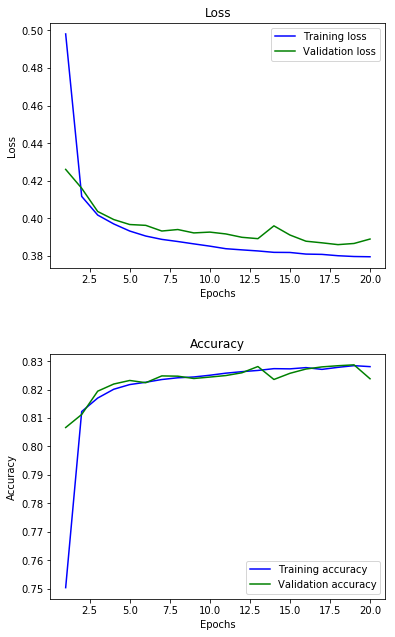

In [5]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=30))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])
print('Model compiled')



print('Training model...')

history = LossHistory()

n_epochs = 20 # Number of epochs definition
n_batch = 512 # Batch size definition



start_time = time.time()


model.fit(x_train, y_train, epochs=n_epochs,
          callbacks=[history],
         # validation_data=(x_test, y_test),
          validation_split=0.10,
          batch_size=n_batch,
          verbose=2,
          shuffle= True)

print("Training duration : {0}".format(time.time() - start_time) + " secs")



# Create a dir for the history output if it is not created yet:
if not os.path.exists('History/'): os.makedirs('History/')

# Plot accuracy and loss:
plot_history(history, Num_classes = 2, n_batch = n_batch, n_epochs = n_epochs)

Model compiled
Training model...
Train on 286799 samples, validate on 31867 samples
Epoch 1/20
 - 14s - loss: 0.6359 - acc: 0.6589 - val_loss: 0.5514 - val_acc: 0.7336
Epoch 2/20
 - 13s - loss: 0.5052 - acc: 0.7615 - val_loss: 0.4843 - val_acc: 0.7757
Epoch 3/20
 - 12s - loss: 0.4680 - acc: 0.7847 - val_loss: 0.4660 - val_acc: 0.7887
Epoch 4/20
 - 11s - loss: 0.4550 - acc: 0.7921 - val_loss: 0.4557 - val_acc: 0.7938
Epoch 5/20
 - 11s - loss: 0.4463 - acc: 0.7963 - val_loss: 0.4482 - val_acc: 0.7966
Epoch 6/20
 - 12s - loss: 0.4391 - acc: 0.7992 - val_loss: 0.4417 - val_acc: 0.7988
Epoch 7/20
 - 12s - loss: 0.4332 - acc: 0.8018 - val_loss: 0.4362 - val_acc: 0.8026
Epoch 8/20
 - 14s - loss: 0.4277 - acc: 0.8042 - val_loss: 0.4309 - val_acc: 0.8035
Epoch 9/20
 - 15s - loss: 0.4225 - acc: 0.8059 - val_loss: 0.4267 - val_acc: 0.8052
Epoch 10/20
 - 14s - loss: 0.4183 - acc: 0.8083 - val_loss: 0.4225 - val_acc: 0.8087
Epoch 11/20
 - 13s - loss: 0.4151 - acc: 0.8101 - val_loss: 0.4195 - val_ac

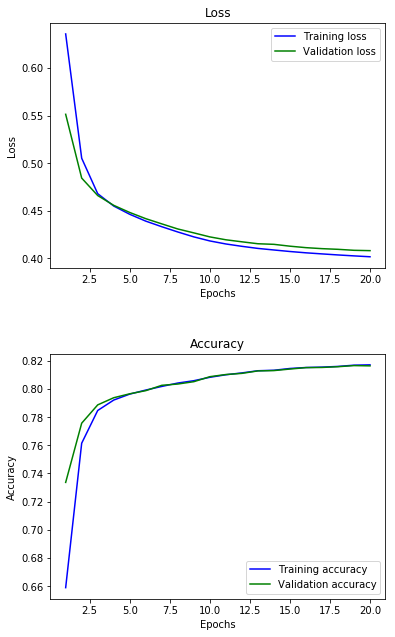

In [6]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=30))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.0001), metrics=['accuracy'])
print('Model compiled')



print('Training model...')

history = LossHistory()

n_epochs = 20 # Number of epochs definition
n_batch = 512 # Batch size definition



start_time = time.time()


model.fit(x_train, y_train, epochs=n_epochs,
          callbacks=[history],
         # validation_data=(x_test, y_test),
          validation_split=0.10,
          batch_size=n_batch,
          verbose=2,
          shuffle= True)

print("Training duration : {0}".format(time.time() - start_time) + " secs")



# Create a dir for the history output if it is not created yet:
if not os.path.exists('History/'): os.makedirs('History/')

# Plot accuracy and loss:
plot_history(history, Num_classes = 2, n_batch = n_batch, n_epochs = n_epochs)

Model compiled
Training model...
Train on 286799 samples, validate on 31867 samples
Epoch 1/200
 - 16s - loss: 0.6056 - acc: 0.6787 - val_loss: 0.5305 - val_acc: 0.7451
Epoch 2/200
 - 12s - loss: 0.5003 - acc: 0.7603 - val_loss: 0.4872 - val_acc: 0.7676
Epoch 3/200
 - 11s - loss: 0.4717 - acc: 0.7762 - val_loss: 0.4677 - val_acc: 0.7805
Epoch 4/200
 - 13s - loss: 0.4556 - acc: 0.7858 - val_loss: 0.4534 - val_acc: 0.7903
Epoch 5/200
 - 12s - loss: 0.4431 - acc: 0.7936 - val_loss: 0.4425 - val_acc: 0.7972
Epoch 6/200
 - 14s - loss: 0.4338 - acc: 0.8000 - val_loss: 0.4348 - val_acc: 0.8017
Epoch 7/200
 - 11s - loss: 0.4268 - acc: 0.8039 - val_loss: 0.4290 - val_acc: 0.8053
Epoch 8/200
 - 12s - loss: 0.4216 - acc: 0.8069 - val_loss: 0.4244 - val_acc: 0.8082
Epoch 9/200
 - 12s - loss: 0.4176 - acc: 0.8091 - val_loss: 0.4218 - val_acc: 0.8093
Epoch 10/200
 - 11s - loss: 0.4143 - acc: 0.8108 - val_loss: 0.4184 - val_acc: 0.8109
Epoch 11/200
 - 12s - loss: 0.4118 - acc: 0.8120 - val_loss: 0.41

 - 7s - loss: 0.3783 - acc: 0.8289 - val_loss: 0.3852 - val_acc: 0.8279
Epoch 97/200
 - 7s - loss: 0.3783 - acc: 0.8290 - val_loss: 0.3871 - val_acc: 0.8273
Epoch 98/200
 - 6s - loss: 0.3780 - acc: 0.8291 - val_loss: 0.3853 - val_acc: 0.8261
Epoch 99/200
 - 6s - loss: 0.3780 - acc: 0.8291 - val_loss: 0.3853 - val_acc: 0.8269
Epoch 100/200
 - 6s - loss: 0.3779 - acc: 0.8288 - val_loss: 0.3854 - val_acc: 0.8267
Epoch 101/200
 - 5s - loss: 0.3779 - acc: 0.8294 - val_loss: 0.3853 - val_acc: 0.8267
Training duration : 812.1632740497589 secs


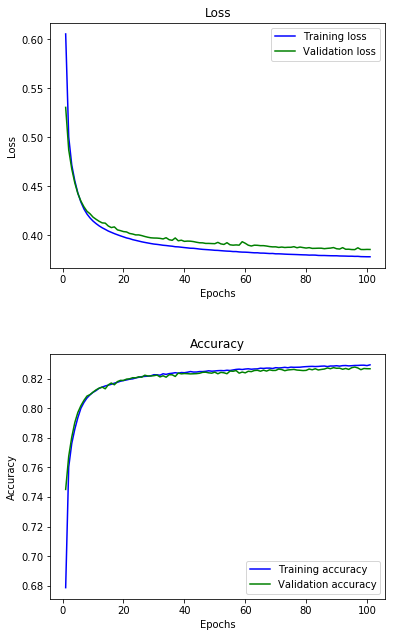

In [7]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential()
model.add(Dense(30, activation='relu', input_dim=30))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.0001), metrics=['accuracy'])
print('Model compiled')



print('Training model...')

history = LossHistory()

callbacks = [EarlyStopping(monitor='val_loss', patience=5), history, ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
n_epochs = 200 # Number of epochs definition
n_batch = 512 # Batch size definition



start_time = time.time()


model.fit(x_train, y_train, epochs=n_epochs,
          callbacks=callbacks,
         # validation_data=(x_test, y_test),
          validation_split=0.10,
          batch_size=n_batch,
          verbose=2,
          shuffle= True)

print("Training duration : {0}".format(time.time() - start_time) + " secs")



# Create a dir for the history output if it is not created yet:
if not os.path.exists('History/'): os.makedirs('History/')

# Plot accuracy and loss:
plot_history(history, Num_classes = 2, n_batch = n_batch, n_epochs = n_epochs)